In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [108]:
df=pd.read_csv("loan.csv")

In [109]:
df.shape

(39717, 111)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [111]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


###                           Cleaning And Manupalting The Data Set
### Percentage of columns wise missing values

In [112]:
k=df.isnull().sum()*100/len(df)
k

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

### droping useless columns which having missing values more than 50% of the data 

In [113]:
k=round(k,2)
m=k.keys()
l=list(filter(lambda x: k[x]>50,m))
df=df.drop(columns=l)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [114]:
df.shape

(39717, 54)

In [115]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Dropping some more coloumns that are not useful for visualization or not meaning full to visualize

In [116]:
df=df.drop(columns=["url","desc","policy_code","application_type","tax_liens","id","emp_title","pub_rec_bankruptcies","title",
                   "chargeoff_within_12_mths","zip_code","out_prncp","out_prncp_inv","revol_util","last_pymnt_d","collections_12_mths_ex_med","last_credit_pull_d"])

In [117]:
df.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

### employement length have some missing values i am considering the missing values as "<1year" for the best uderstanding the visualisation

In [118]:
df["emp_length"]=df["emp_length"].fillna('< 1 year')


In [119]:
df.isnull().sum()

member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amn


### Understanding the distribution of loan amount
### Using histograms and kde plots
### Univariate Analysis


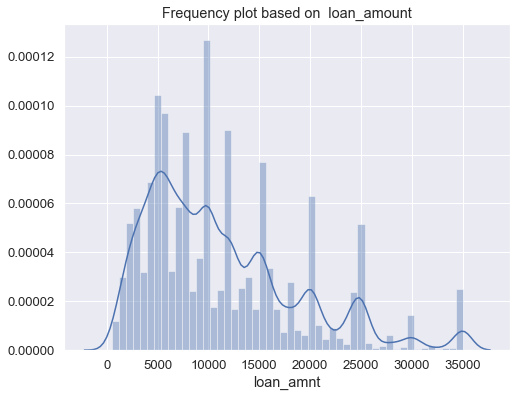

In [120]:
sns.set(font_scale=(1.2))
plt.figure(figsize=(8,6))
plt.title("Frequency plot based on  loan_amount")
sns.distplot(df["loan_amnt"],kde=True)

### How the frequency is distributed based on loan_status

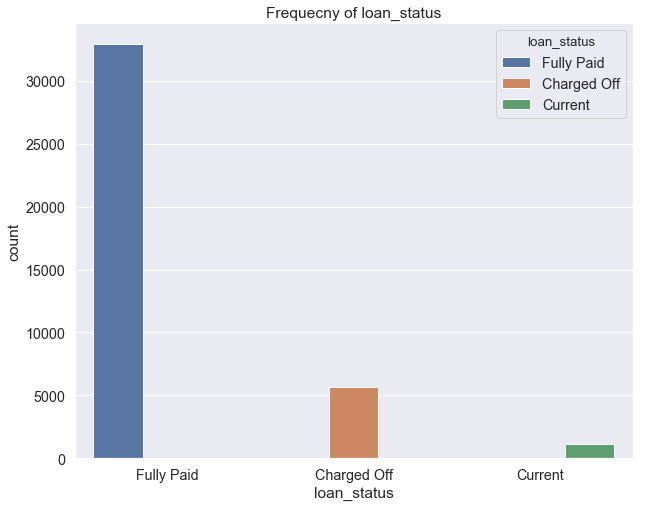

In [121]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,8))
plt.title("Frequecny of loan_status")
ax=sns.countplot(x="loan_status",hue="loan_status",data=df)


plt.show()

### Converting th interest_rate into float number example( 19.26% to 19.26) for the best visualization purpose

In [122]:
l=list(map(lambda x : float(x[:-1]),df["int_rate"]))
df["int_rate"]=l
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0,0
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0,0
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0,0
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0,0
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0,0


### Bi_Variate Analysis

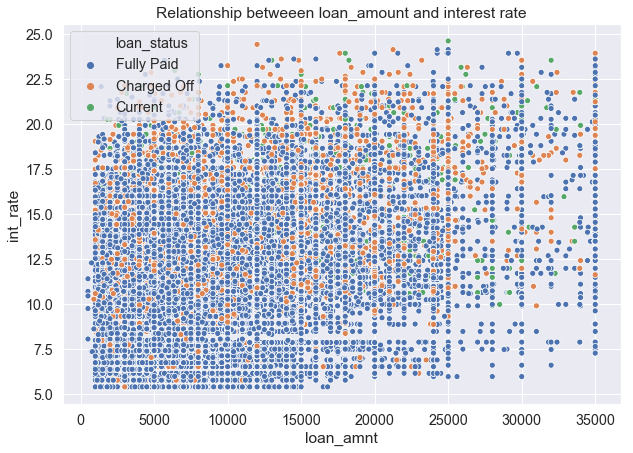

In [123]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,7))
plt.title("Relationship betweeen loan_amount and interest rate")
sns.scatterplot(x="loan_amnt",hue="loan_status",y="int_rate",data=df)

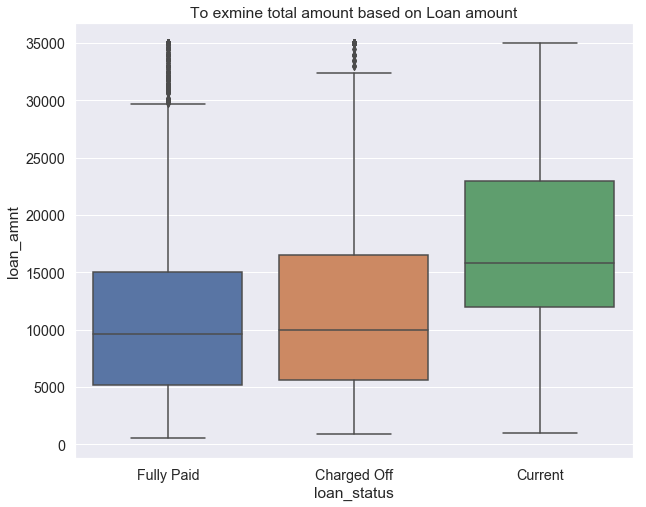

In [124]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,8))
plt.title("To exmine total amount based on Loan amount")
sns.boxplot(x="loan_status",y="loan_amnt",data=df)

### adding one more column issued year to see how the company growth varying yearly

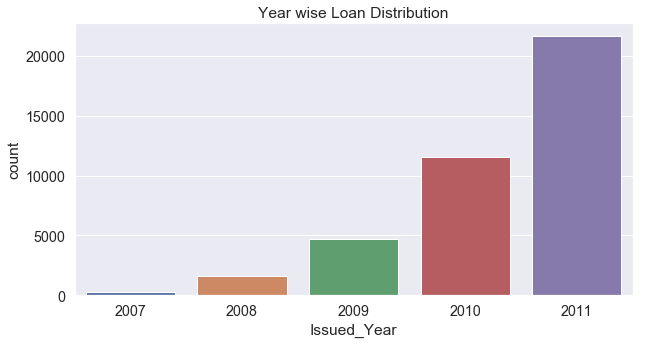

In [125]:

l1=list(map(lambda x : int(x[-2:])+2000,df["issue_d"]))
df["Issued_Year"]=l1
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,5))
plt.title("Year wise Loan Distribution")
sns.countplot(df["Issued_Year"])

### Relationship between loan_amount and funded amount

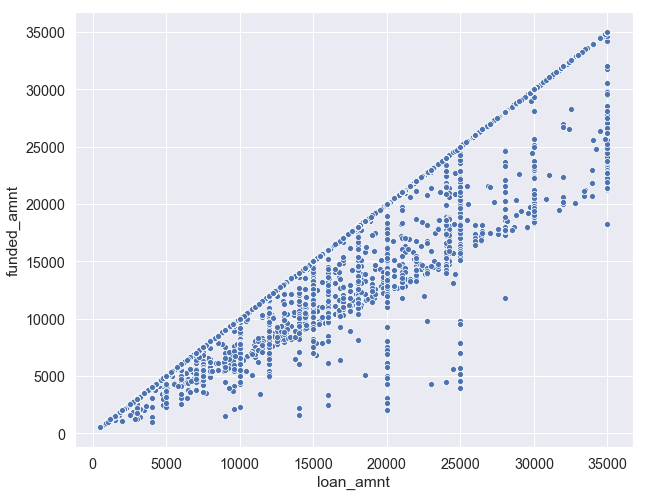

In [126]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,8))
sns.scatterplot(x="loan_amnt",y="funded_amnt",data=df)

### To examine loan interest rate based on grade

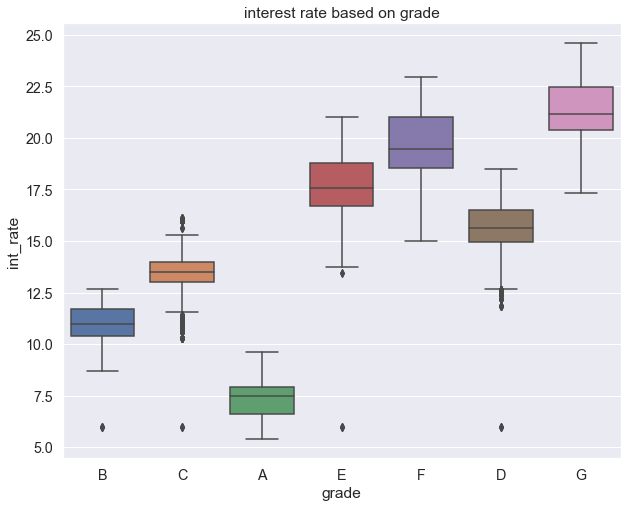

In [127]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,8))
plt.title("interest rate based on grade")
sns.boxplot(x="grade",y="int_rate",data=df)

### To examine interest_rate based on home of the ownership

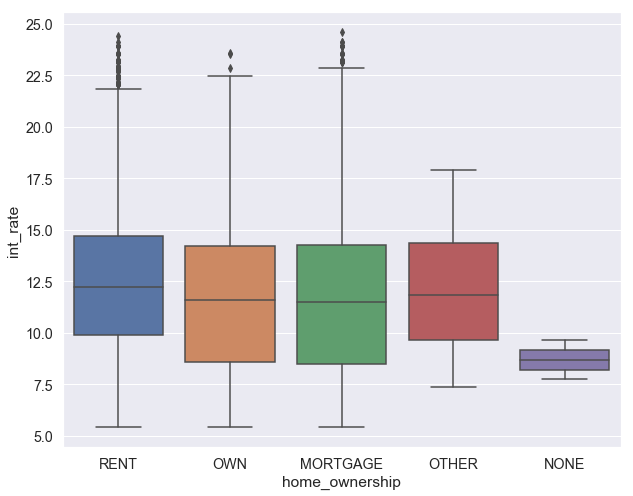

In [128]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,8))
sns.boxplot(x="home_ownership",y="int_rate",data=df)

### To examine the loan_amount based on grade

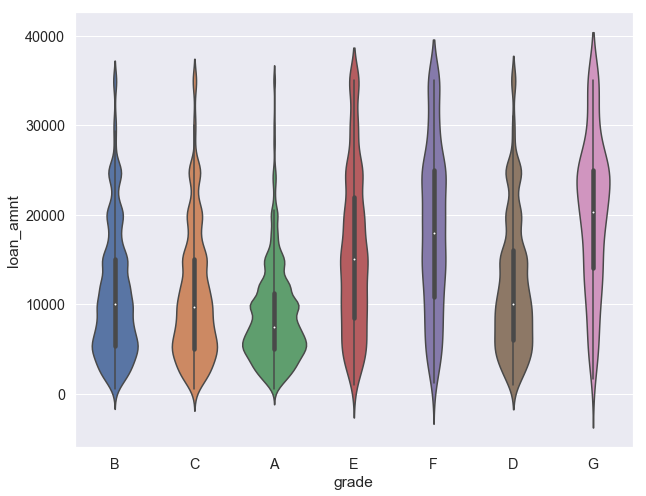

In [129]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,8))
sns.violinplot(x="grade",y="loan_amnt",data=df)

### multi-variate analysis


### Distribution of loan amounts using histograms and kde plots according to type of loan grade

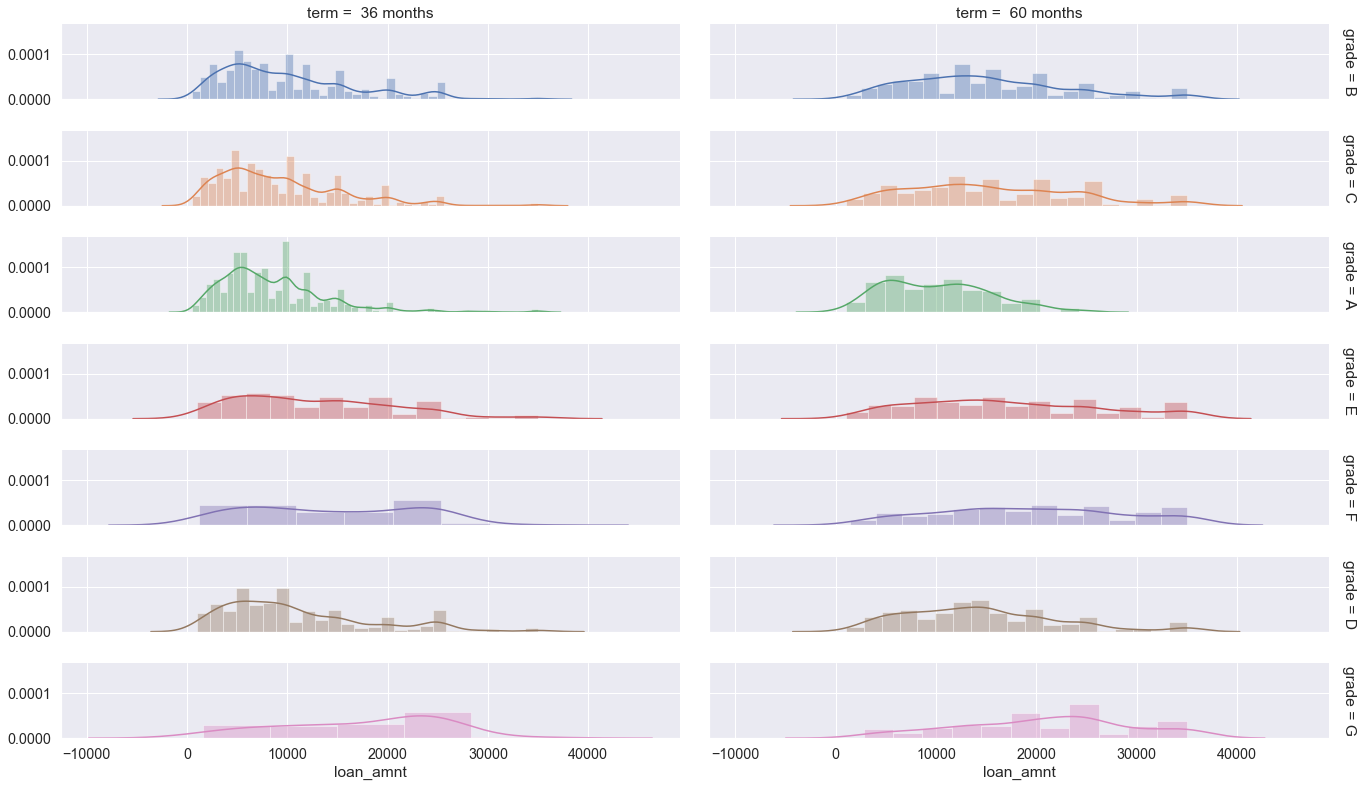

In [130]:
sns.set(font_scale=(1.3))

g=sns.FacetGrid(df, row="grade",col="term",hue="grade", margin_titles=True, height=1.6,aspect=6)
g.map(sns.distplot,"loan_amnt",hist=True)

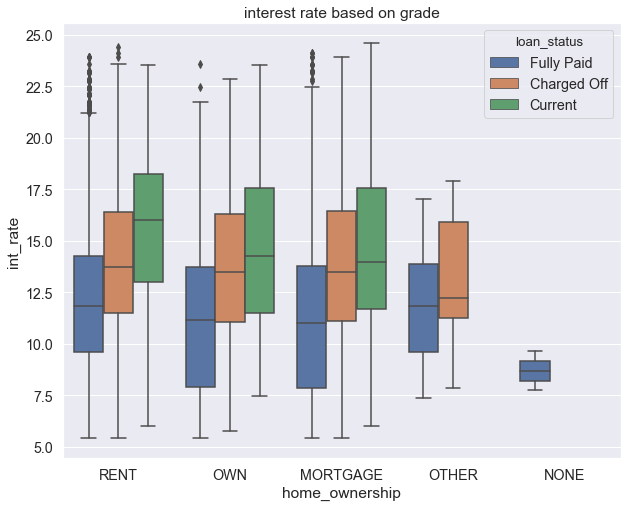

In [131]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,8))
plt.title("interest rate based on grade")
sns.boxplot(x="home_ownership",y="int_rate",hue="loan_status",data=df)

### Examine frequecy of employment length based on loan_status

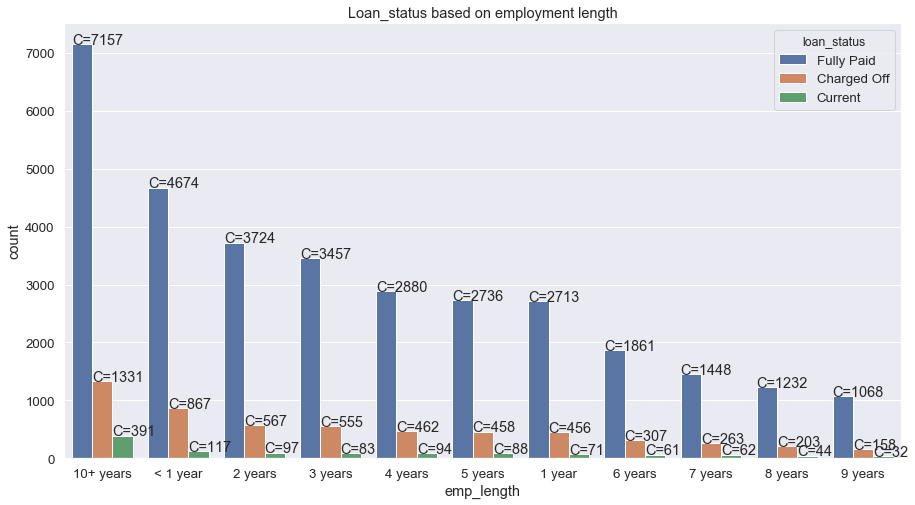

In [132]:
sns.set(font_scale=(1.21))
plt.figure(figsize=(15,8))
plt.title("Loan_status based on employment length")
ax=sns.countplot(x="emp_length",hue="loan_status",data=df,
             order=df["emp_length"].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0, height+ 2, 'C=%.0f'%(height))
plt.show()

### from the above figure you can observe that based on employement lenght, in every set of category thier is a chareged off applicants , and one more thing is that 
### in every category of employemnt length 15% to 20% of applicants are not paying the loan 

### Risk analysis of the Charged off applicants 

In [133]:
df1=df[df["loan_status"]=="Charged Off"]

In [134]:
df1.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,Issued_Year
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,1008.71,456.46,435.17,0.0,117.08,1.1100,119.66,0,0,2011
8,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4 years,...,646.02,162.02,294.94,0.0,189.06,2.0900,152.39,0,0,2011
9,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,< 1 year,...,1469.34,673.48,533.42,0.0,269.29,2.5200,121.45,0,0,2011
12,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,< 1 year,...,2270.70,1256.14,570.26,0.0,444.30,4.1600,305.38,0,0,2011
14,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,B2,3 years,...,7471.99,5433.47,1393.42,0.0,645.10,6.3145,325.74,0,0,2011


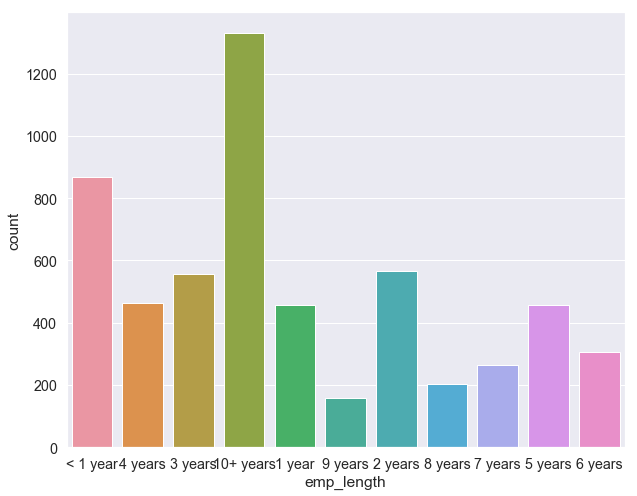

In [135]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,8))
sns.countplot(x="emp_length",data=df1)


### From the available data to finding  the correlation between int_rate,funded amount,loan amount,insatallment

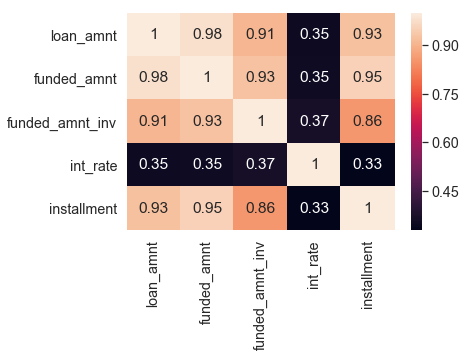

In [136]:
df2=df1[["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment"]]
corr=df2.corr()
sns.heatmap(corr,annot=True)

### Analysis on the fully paid applicants 

In [137]:
df3=df[df["loan_status"]=="Fully Paid"]

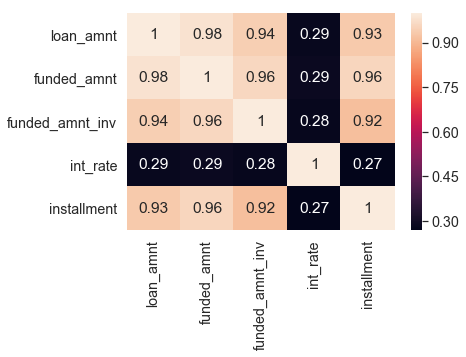

In [138]:
df4=df3[["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment"]]
corr=df4.corr()
sns.heatmap(corr,annot=True)

### From the both heat map thier is no much difference between the funding amount, interest rate, loan amout,installment.
### slight difference 0.17 percentage in some relation based on int_rate

### To reduce risk loan applicants my suggesion

#### 1. Decrease the loan_amount
####  2. Increase Interest Rates Only for these applicants 
####  3. show them credit score if you are not going to pay installments your credit score is going to decrease based on the following factors

### Useful Atrributes

##### 1.loan_amnt,2.fund_amnt,3.fund_amnt_invt,4.int_rates,5.Issue_Date,
##### 6.Repayment_Date,7.Insatllments,8.grades,9.House_Owneeship,10.application_type,11.emp_lenght.




 ##                                                     THANK YOU